# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Fakhira Lahen Siregar
- **Email:** fahiralahens@gmail.com
- **ID Dicoding:** fakhiralahensiregar

### Data Information

**Data Set Information:**
<br>
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.
Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

**Attribute Information:**<br>
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

instant: record index<br>

dteday : date<br>

season : season (1:springer, 2:summer, 3:fall, 4:winter)<br>

yr : year (0: 2011, 1:2012)<br>

mnth : month ( 1 to 12)<br>

hr : hour (0 to 23)<br>

holiday : weather day is holiday or not (extracted from [Web Link])<br>

weekday : day of the week<br>

workingday : if day is neither weekend nor holiday is 1, otherwise is 0.<br>

weathersit :<br>
1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog<br>

temp : Normalized temperature in Celsius.<br> The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)<br>

atemp: Normalized feeling temperature in Celsius.<br> The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)<br>

hum: Normalized humidity. The values are divided to 100 (max)<br>

windspeed: Normalized wind speed. The values are divided to 67 (max)<br>

casual: count of casual users<br>

registered: count of registered users<br>

cnt: count of total rental bikes including both casual and registered<br>

http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh **cuaca** terhadap jumlah peminjaman sepeda?
- Pertanyaan 2 : Bagaimana pola peminjaman sepeda berdasarkan **jam (24 jam)**?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
day_df=pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df=pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

### Menilai tabel 'day_df'

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
day_df.isna().sum()
#tidak ada missing value

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
day_df.duplicated().sum()
#tidak ada data duplikat

0

In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


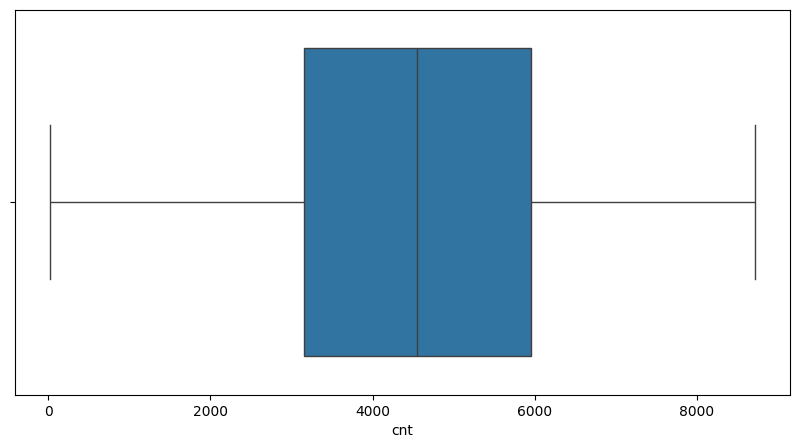

'\ncnt adalah jumlah total sepeda yang dipinjam dalam satu hari (pada day.csv)\natau dalam satu jam (pada hour.csv). Sehingga, cnt = casual + registered.\n'

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x=day_df["cnt"])
plt.show()
"""
cnt adalah jumlah total sepeda yang dipinjam dalam satu hari (pada day.csv)
atau dalam satu jam (pada hour.csv). Sehingga, cnt = casual + registered.
"""

In [ ]:
print(day_df["season"].unique())  # Cek kategori musim
print(day_df["weathersit"].unique())  # Cek kategori cuaca

[1 2 3 4]
[2 1 3]


### Menilai data hour_df

In [ ]:
hour_df.info()
#ada beberapa dtype yang perlu diperbaiki seperti dteday harusnya datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hour_df.isna().sum()
#tidak ada missing value

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
hour_df.duplicated().sum()
#tidak ada data duplikat

0

In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- tipe  data pada day_df dan hour_df harus diperbarui
- tidak ada missing value maupun duplikat data pada day_df dan hour_df

### Cleaning Data

### konversi tipe data pada day_df

In [ ]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

### konversi tipe data pada hour_df

In [ ]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Berhasil memberikan tipe data yang sesuai untuk masing-masing atribut dataset

## Exploratory Data Analysis (EDA)

### Explore day_df

In [ ]:
# Mencari nilai distribusi (frekuensi) kategori cuaca dengan fungsi value_counts()
# (1 = Cerah, 2 = Berawan/Mendung, 3 = Hujan ringan/Snow, 4 = Hujan lebat/Snow lebat).
day_df["weathersit"].value_counts()

,count
weathersit,
1,463
2,247
3,21


In [ ]:
# melihat deskripsi dari pivot antar weathersit (cuaca) dan cnt (jumlah peminjam)
day_df.groupby(by="weathersit").agg({
    "cnt": ["count","max", "min", "mean", "std"]
})

cnt                                     
           count   max  min         mean          std
weathersit                                           
1            463  8714  431  4876.786177  1879.483989
2            247  8362  605  4035.862348  1809.109918
3             21  4639   22  1803.285714  1240.284449

**Insight exploratary day_df: mencari hubungan cuaca dan jumlah peminjam**
-  Dalam 2 tahun cuaca lebih banyak cerah sekitar 63%, mendung sekitar 34% dan hujan lebat sekitar 3%
- Pada cuaca cerah (1), jumlah peminjam rata-rata yaitu 4876 peminjam, sedangkan pada cuaca mendung (2) rata-rata ada sekitar 4035 peminjam, dan pada saat hujan (3) rata-rata ada sekitar 1803 peminjam

### Exploratary hour_df

In [ ]:
hour_df["weathersit"].value_counts()

,count
weathersit,
1,11413
2,4544
3,1419
4,3


In [ ]:
# Mencari nilai distribusi pada jam pinjaman (hr) dengan jumlah peminjam (cnt)
hour_df.groupby(by="hr").agg({
    "cnt": ["count","max", "min", "mean", "std"]
})

cnt                                 
   count  max min        mean         std
hr                                       
0    726  283   2   53.898072   42.307910
1    724  168   1   33.375691   33.538727
2    715  132   1   22.869930   26.578642
3    697   79   1   11.727403   13.239190
4    697   28   1    6.352941    4.143818
5    717   66   1   19.889819   13.200765
6    725  213   1   76.044138   55.084348
7    727  596   1  212.064649  161.441936
8    727  839   5  359.011004  235.189285
9    727  426  14  219.309491   93.703458
10   727  539   8  173.668501  102.205413
11   727  663  10  208.143054  127.495536
12   728  776   3  253.315934  145.081134
13   729  760  11  253.661180  148.107657
14   729  750  12  240.949246  147.271574
15   729  750   7  251.233196  144.632541
16   730  783  11  311.983562  148.682618
17   730  976  15  461.452055  232.656611
18   728  977  23  425.510989  224.639304
19   728  743  11  311.523352  161.050359
20   728  567  11  226.030220  119.670164
21   728  584   6  172.314560   89.788893
22   728  502   9  131.335165   69.937782
23   728  256   2   87.831044   50.846889

In [ ]:
jam_terbanyak = hour_df.groupby("hr")["cnt"].mean().idxmax()
if jam_terbanyak>12:
    jam_terbanyak-=12
    waktu = "PM"
else:
    waktu = "AM"
print("Pengunjung terbanyak biasanya ada di jam :", jam_terbanyak+1, waktu)

Pengunjung terbanyak biasanya ada di jam : 6 PM


In [ ]:
jam_sedikit = hour_df.groupby("hr")["cnt"].mean().idxmin()
if jam_sedikit>12:
    jam_sedikit-=12
    waktu = "PM"
else:
    waktu = "AM"
print("Pengunjung paling sedikit biasanya ada di jam :", jam_sedikit+1, waktu)

Pengunjung paling sedikit biasanya ada di jam : 5 AM


In [ ]:
hour_df.groupby(by="hr").agg({
    "registered": ["max", "min", "mean"],
    "casual": ["max", "min", "mean"]
})

registered                 casual               
          max min        mean    max min       mean
hr                                                 
0         234   0   43.739669     68   0  10.158402
1         139   0   26.871547     49   0   6.504144
2         104   0   18.097902     44   0   4.772028
3          61   0    9.011478     26   0   2.715925
4          22   0    5.098996     13   0   1.253945
5          64   0   18.478382     16   0   1.411437
6         203   0   71.882759     19   0   4.161379
7         572   1  201.009629     40   0  11.055021
8         808   4  337.331499     69   0  21.679505
9         399   6  188.418157    142   0  30.891334
10        351   8  127.191197    209   0  46.477304
11        446   5  148.602476    268   0  59.540578
12        526   3  185.021978    362   0  68.293956
13        491   9  181.352538    355   0  72.308642
14        502  12  165.381344    361   0  75.567901
15        456   4  176.327846    357   0  74.905350
16        481   8  238.238356    367   0  73.745205
17        885  14  387.178082    347   0  74.273973
18        886  20  364.390110    266   0  61.120879
19        662  11  262.752747    230   0  48.770604
20        461   8  189.796703    237   0  36.233516
21        362   6  144.059066    222   0  28.255495
22        327   5  109.082418    175   0  22.252747
23        220   2   72.631868     71   0  15.199176

In [ ]:
# Menghitung total jumlah peminjam casual dan registered
total_pinjaman = hour_df["cnt"].sum()
total_casual = hour_df["casual"].sum()
total_registered = hour_df["registered"].sum()
print(f"Total Pinjaman Sepeda: {total_pinjaman}")
print(f"Total Casual Users: {total_casual}")
print(f"Total Registered Users: {total_registered}")


Total Pinjaman Sepeda: 3292679
Total Casual Users: 620017
Total Registered Users: 2672662


**Insight exploratary hour_df: mencari hubungan jam pinjaman dan jumlah peminjam**
-  Dalam 2 tahun, pengunjung terbanyak biasanya ada di jam 6 PM, dan pengunjung paling sedikit biasanya ada di jam 5 AM
- Total pinjaman sepeda dalam 2 tahun yakni 3.292.679

## Visualization & Explanatory Analysis

<ipython-input-83-1dbb47223c23>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="weathersit", y="cnt", data=day_df, estimator=sum, ci=None)


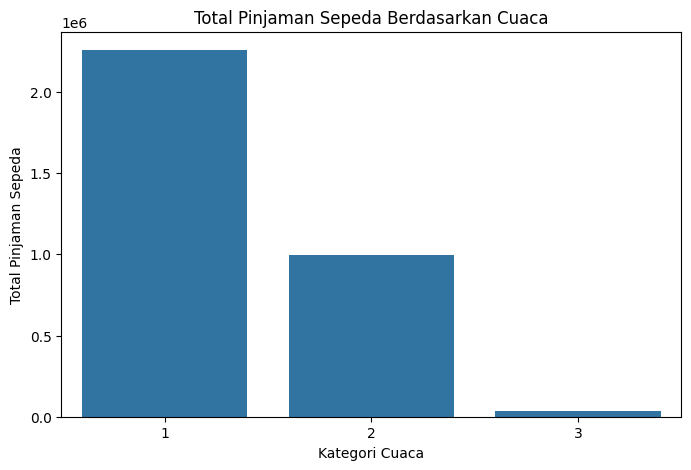

In [ ]:
# Memvisualisasikan distribusi Jumlah Pinjaman Sepeda dengan Cuaca menggunakan
# barchart karena saya ingin melihat pesebarannya
plt.figure(figsize=(8,5))
sns.barplot(x="weathersit", y="cnt", data=day_df, estimator=sum, ci=None)
plt.xlabel("Kategori Cuaca")
plt.ylabel("Total Pinjaman Sepeda")
plt.title("Total Pinjaman Sepeda Berdasarkan Cuaca")
plt.show()

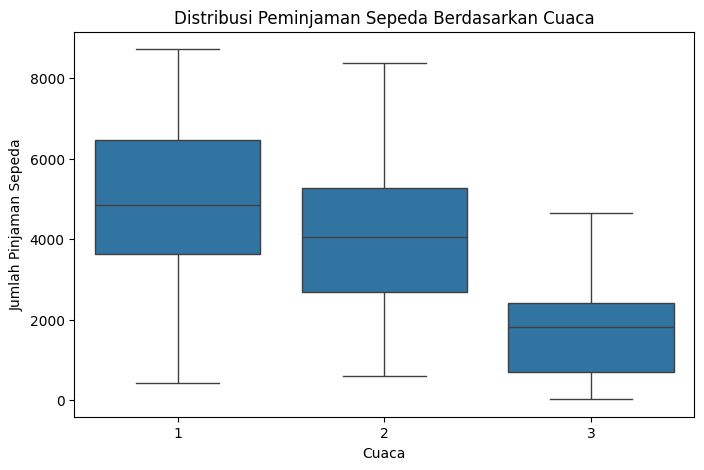

In [ ]:
# Memvisualisasikan distribusi Jumlah Pinjaman Sepeda dengan Cuaca menggunakan
# boxplot karena saya ingin melihat pesebarannya
plt.figure(figsize=(8,5))
sns.boxplot(x="weathersit", y="cnt", data=day_df)
plt.xlabel("Kategori Cuaca")
plt.ylabel("Jumlah Pinjaman Sepeda")
plt.title("Distribusi Peminjaman Sepeda Berdasarkan Cuaca")
plt.show()

In [ ]:
# Menghitung korelasi antara kedua atribut weathersit dan cnt dengan menggunakan fungsi corr()
correlation = day_df["weathersit"].corr(day_df["cnt"])
print(f"Korelasi antara Cuaca dan Peminjaman Sepeda: {correlation}")

Korelasi antara Cuaca dan Peminjaman Sepeda: -0.2973912388346637


<ipython-input-86-2e376c8dbcc1>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x="hr", y="cnt", data=hour_df, estimator="mean", ci=None)


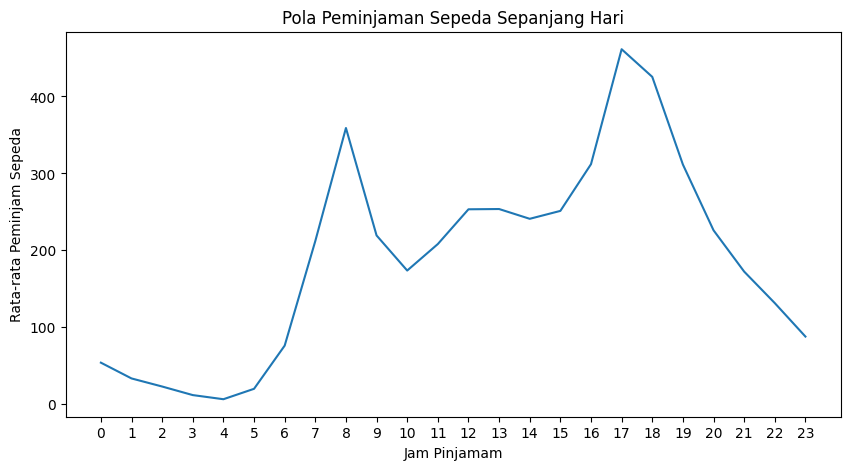

In [ ]:
# Memvisualisasikan rata-rata Jumlah Pinjaman Sepeda dengan jam pinjaman menggunakan line chart
# karena ingin melihat perubahan distribusi
plt.figure(figsize=(10,5))
sns.lineplot(x="hr", y="cnt", data=hour_df, estimator="mean", ci=None)
plt.xlabel("Jam Pinjamam")
plt.ylabel("Rata-rata Peminjam Sepeda")
plt.title("Pola Peminjaman Sepeda Sepanjang Hari")
plt.xticks(range(0, 24))
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)
Saya perlu meninjau hal lain seperti hari kerja, atau hari libur untuk melihat bagaimana pesebaran jumlah pengunjung.

## Conclusion

### Pertanyaan 1:  Bagaimana pengaruh **cuaca** terhadap jumlah peminjaman sepeda?

Dapat kita lihat pada data korelasi, atribut cuaca (weathersit) dan jumlah pinjaman (cnt) hasil nya yaitu -0.29 yang artinya jika nilai korelasi negatif maka kedua atribut itu berlawanan dan karena mendekati 0 maka kedua atribut tersebut tidak berkorelasi (lemah)

### Pertanyaan 2: Bagaimana pola peminjaman sepeda berdasarkan **jam (24 jam)**?

Jumlah peminjam paling banyak yaitu pada pagi hari, dan sore menjelang malam. Sedangkan jumlah peminjam paling sedikit yaitu ketika pada malam atau dini hari.

In [ ]:
all_df = pd.concat([day_df, hour_df], ignore_index=True)

# Simpan ke file CSV
all_df.to_csv("all_data.csv", index=False)